<a href="https://colab.research.google.com/github/Shreyapowar9961/Deep_Learning_sem6/blob/main/Ass1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv('/content/Admission_Predict.csv')
print(df.shape)
print(df.head())

(400, 9)
   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  \
0           1        337          118                  4  4.5  4.5  9.65   
1           2        324          107                  4  4.0  4.5  8.87   
2           3        316          104                  3  3.0  3.5  8.00   
3           4        322          110                  3  3.5  2.5  8.67   
4           5        314          103                  2  2.0  3.0  8.21   

   Research  Chance of Admit  
0         1                1  
1         1                1  
2         1                0  
3         1                1  
4         0                0  


In [ ]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 28.3 KB
None
       Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  400.000000  400.000000   400.000000         400.000000  400.000000   
mean   200.500000  316.807500   107.410000           3.087500    3.400000   
std    115.614301   11.473646     6.069514           1.143728    1.006869   
min 

In [ ]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


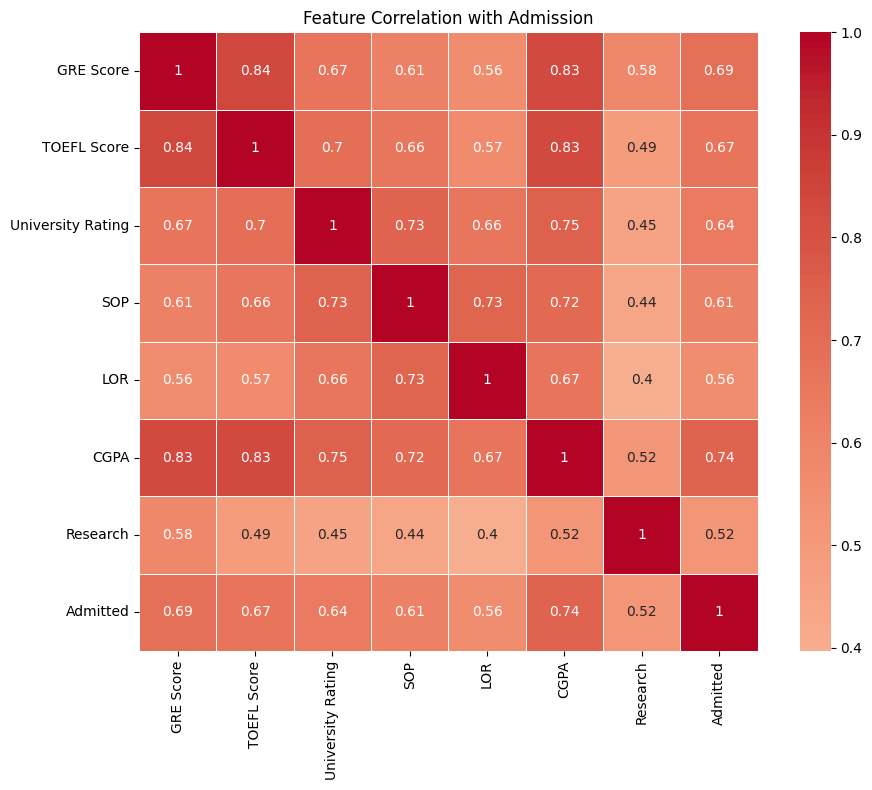

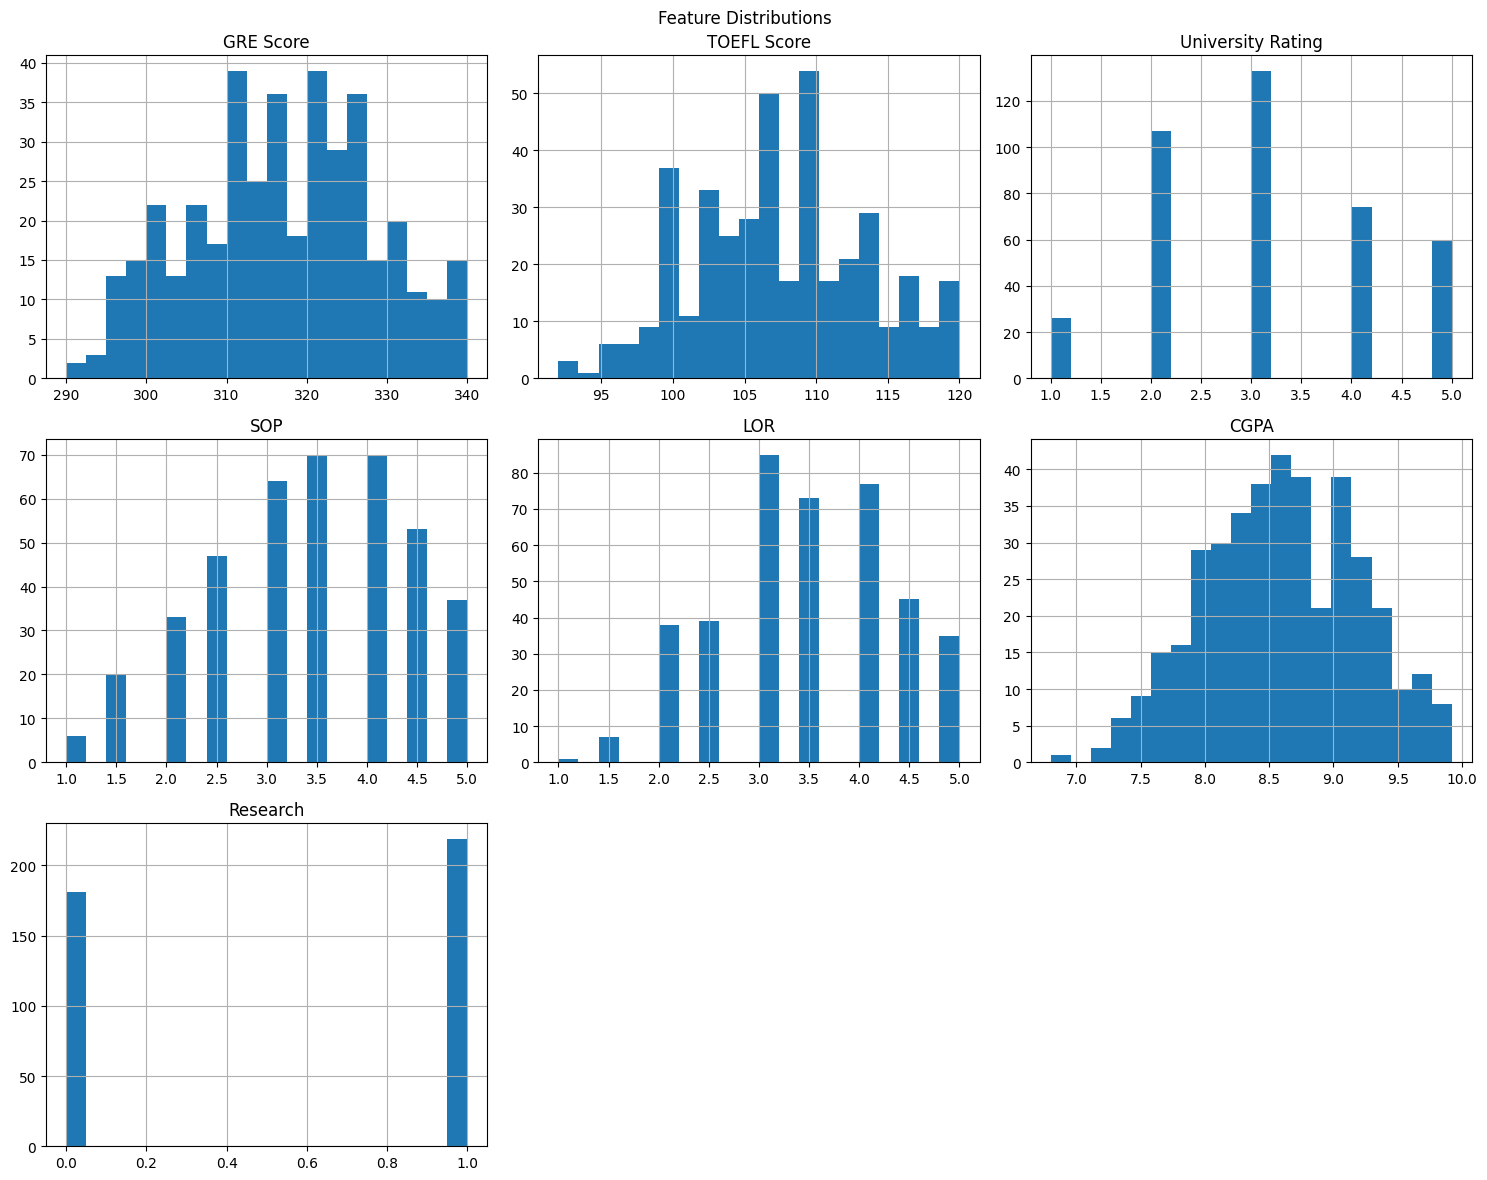

Correlations with Admitted:
Admitted             1.000000
CGPA                 0.737307
GRE Score            0.686138
TOEFL Score          0.672465
University Rating    0.638983
SOP                  0.612152
LOR                  0.557481
Research             0.519441
Name: Admitted, dtype: float64


In [ ]:
plt.figure(figsize=(10,8))
corr_matrix = df[features + ['Admitted']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Feature Correlation with Admission')
plt.tight_layout()
plt.show()

df[features].hist(bins=20, figsize=(15,12))
plt.suptitle('Feature Distributions')
plt.tight_layout()
plt.show()

print("Correlations with Admitted:")
print(corr_matrix['Admitted'].sort_values(ascending=False))


In [ ]:
from sklearn.model_selection import train_test_split

features = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']
X = df[features]
y = df['Admitted']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"X_train shape: {X_train.shape}")  # (400, 7)
print(f"y_train shape: {y_train.shape}")  # (400,)
print("\nTrain class distribution:\n", y_train.value_counts(normalize=True))


Training set: 320 samples
Test set: 80 samples
X_train shape: (320, 7)
y_train shape: (320,)

Train class distribution:
 Admitted
0    0.55
1    0.45
Name: proportion, dtype: float64


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialize a new Sequential model
model_improved = Sequential([
    Dense(units=64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(units=32, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

# Compile the model
model_improved.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Print the model summary
model_improved.summary()

# Train the model
history_improved = model_improved.fit(
    X_train_scaled, y_train,
    epochs=50,
    validation_split=0.1,
    verbose=1
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,625 (10.25 KB)

 Trainable params: 2,625 (10.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.7287 - loss: 0.5667 - val_accuracy: 0.8750 - val_loss: 0.4341
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8309 - loss: 0.4625 - val_accuracy: 0.8750 - val_loss: 0.3529
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8487 - loss: 0.4019 - val_accuracy: 0.9062 - val_loss: 0.2959
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8919 - loss: 0.3160 - val_accuracy: 0.9375 - val_loss: 0.2542
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8769 - loss: 0.3080 - val_accuracy: 0.9375 - val_loss: 0.2276
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8594 - loss: 0.2939 - val_accuracy: 0.9375 - val_loss: 0.2100
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8658 - loss: 0.2930 - val_accuracy: 0.9375 - val_loss: 0.2006
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8971 - loss: 0.2332 - val_accuracy: 0.9375 - val_loss: 0.1945


In [ ]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"FINAL TEST ACCURACY: {test_accuracy:.4f}")

FINAL TEST ACCURACY: 0.8750
